# Imports

In [1]:
# linear algebra
import numpy as np

# data handling
import pandas as pd

# plotting
import matplotlib.pyplot as plt
from matplotlib import cm

# path handling
import os
from pathlib import Path

In [2]:
base_dir = Path("/zdata/user-data/noam/data/p2cs/")
full_genomes_dir = base_dir / "full_genomes_new"
organism_merged_genomes_dir = base_dir / "organism_merged_genomes_new"
genome_analysis_dir = base_dir / "genome_analysis_results"
mash_analysis_dir = base_dir / "mash_analysis"
data_dir = mash_analysis_dir / "distance_matrices"  # For genome-level matrices
taxonomy_dir = base_dir / "taxonomy"
merged_data_dir = base_dir / "merged_p2cs_data"
k_values = [11, 15, 19, 21]

# Load Data

In [ ]:
# load dataframes
# filtered_groups_df = pd.read_pickle(merged_data_dir / "p2cs_filtered_groups.pkl")
# orphan_df = pd.read_pickle(merged_data_dir / "_p2cs_orphan_data.pkl")
# all_df = pd.read_pickle(merged_data_dir / "_p2cs_all_data.pkl")
# filtered_df = pd.read_pickle(merged_data_dir / "_p2cs_filtered_data.pkl")


In [12]:
import copy

df_to_display = all_df.head(3).copy()
if 'file_name' in df_to_display.columns:
    df_to_display['file_name'] = df_to_display['file_name'].apply(lambda x: (x[:23] + '...') if isinstance(x, str) and len(x) > 23 else x)
if 'aa_sequence' in df_to_display.columns:
    df_to_display['aa_sequence'] = df_to_display['aa_sequence'].apply(lambda x: (x[:23] + '...') if isinstance(x, str) and len(x) > 23 else x)
if 'nt_sequence' in df_to_display.columns:
    df_to_display['nt_sequence'] = df_to_display['nt_sequence'].apply(lambda x: (x[:23] + '...') if isinstance(x, str) and len(x) > 23 else x)
display(df_to_display)
print("Number of rows: ", len(all_df))

,Gene,Start,Stop,Strand,Original description,class,type,P2CS description,tm,file_name,db_id,organism,Gene_num,frame,aa_sequence,nt_sequence
0,Asuc_0162,191189,192874,-,hypothetical protein,HK,Classic,"Histidine kinase, Classic contains 1 HAMP,1 Hi...",2,ActsuDB_Actinobacillus_...,ActsuDB,Actinobacillus succinogenes 130Z,162,-1,VNVKKSVTTRIARYLITVIIFAG...,GTGAACGTTAAAAAATCGGTGAC...
1,Asuc_0362,412438,413067,+,two component LuxR family transcriptional ...,RR,NarL,"Response regulator, NarL family contains 1 Res...",0,ActsuDB_Actinobacillus_...,ActsuDB,Actinobacillus succinogenes 130Z,362,1,MTEKTKVLLIDDHPLMRRGIKQL...,ATGACAGAAAAAACGAAAGTTCT...
2,Asuc_0781,841792,842496,+,two component transcriptional regulator,RR,OmpR,"Response regulator, OmpR family contains 1 Res...",0,ActsuDB_Actinobacillus_...,ActsuDB,Actinobacillus succinogenes 130Z,781,1,MTKILLVDDDIELTDLLGELLSL...,ATGACGAAAATTTTATTAGTCGA...


Number of rows:  148510


In [4]:
all_df['Gene'].unique().shape

NameError: name 'all_df' is not defined

In [ ]:
set(orphan_df['Gene'].unique())

SyntaxError: unmatched ')' (2858671991.py, line 1)

In [ ]:
filtered_df.loc[filtered_df['tcs_organization'] == 'Orphan']['Gene']

10         BamMC406_0187
11         BamMC406_0188
82       BURPS1710b_1252
83       BURPS1710b_1253
138           M892_16180
              ...       
88066          Glov_1117
88067          Glov_1118
88076          Glov_1548
88077          Glov_1549
88078          Glov_1550
Name: Gene, Length: 5390, dtype: object

In [ ]:
len(set(filtered_df['Gene'].unique()).intersection(set(orphan_df['Gene'].unique())))

27

In [ ]:
filtered_groups_df['tcs_organization_int'].value_counts()

tcs_organization_int
2.0     74881
3.0      4842
4.0      1829
5.0       410
6.0       115
7.0        74
8.0        15
10.0        8
Name: count, dtype: int64

In [ ]:
filtered_groups_df['tcs_organization'].value_counts()

tcs_organization
Pair       74881
Triad       4842
Tetrad      1829
Pentad       410
Missing      138
Hexad        115
Heptad        74
Octad         15
Decad          8
Name: count, dtype: int64

# Plot

## Pie Charts

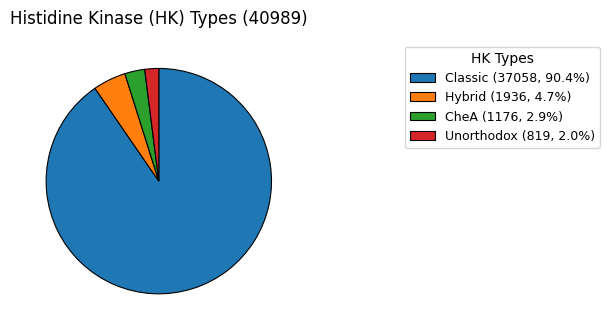

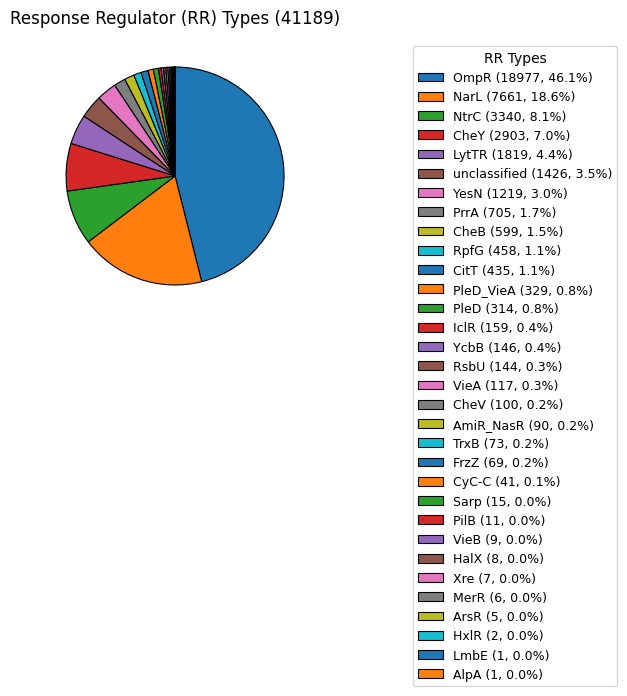

In [30]:
def pie_with_legend_pcts(series, title, legend_title, pct_fmt="{:.1f}%"):
    # Sort descending so legend & wedges are consistent
    counts = series.sort_values(ascending=False)
    total = counts.sum()
    labels = counts.index.to_list()
    sizes  = counts.values.astype(float)
    pcts   = sizes / total * 100.0

    fig, ax = plt.subplots(figsize=(7,7))
    wedges, _ = ax.pie(
        sizes,
        startangle=90,
        counterclock=False,
        wedgeprops=dict(edgecolor="black", linewidth=0.8)
    )

    # Legend: Label (count, pct)
    legend_labels = [
        f"{lab} ({int(cnt)}, {pct_fmt.format(p)})"
        for lab, cnt, p in zip(labels, sizes, pcts)
    ]
    ax.legend(
        wedges, legend_labels, title=legend_title,
        bbox_to_anchor=(1.35, 1.0), loc="upper left",
        frameon=True, fontsize=9, title_fontsize=10
    )

    ax.set_title(f"{title} ({int(total)})", pad=12)
    ax.set_aspect('equal')
    plt.tight_layout()

    plt.savefig(f"{title.lower().replace(' ', '_')}.png", dpi=300, bbox_inches='tight')

    plt.show()


# ---- Example use ----
hk_counts = filtered_groups_df[filtered_groups_df['class'] == 'HK']["type"].value_counts()
pie_with_legend_pcts(hk_counts, "Histidine Kinase (HK) Types", "HK Types")

rr_counts = filtered_groups_df[filtered_groups_df['class'] == 'RR']["type"].value_counts()
pie_with_legend_pcts(rr_counts, "Response Regulator (RR) Types", "RR Types")

## Lengths

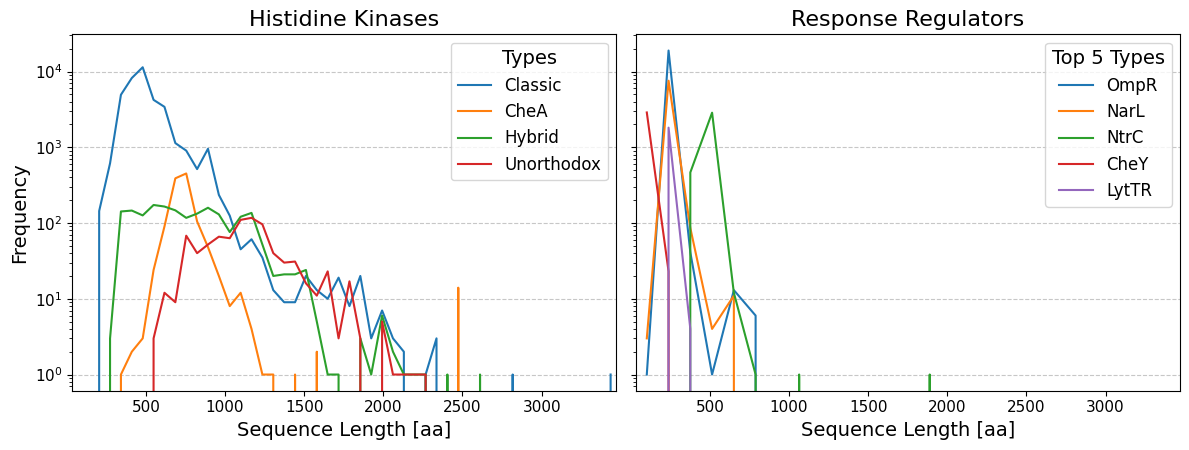

In [59]:
# Make frequency polygons (line plots) by 'type' within each 'class'

bins1 = 50
bins2 = 25

# Prepare data for HK and RR, split by 'type'
hk_df = filtered_groups_df[filtered_groups_df['class'] == 'HK']
rr_df = filtered_groups_df[filtered_groups_df['class'] == 'RR']

# Find top 5 most abundant types in RR for legend and plotting
rr_type_counts = rr_df['type'].value_counts()
rr_top_types = rr_type_counts.head(5).index.tolist()

# Get all types for HK and only top 5 types for RR
hk_types = hk_df['type'].unique()
rr_types = rr_top_types  # Only plot top 5 RR types

hk_type_lengths = [hk_df[hk_df['type'] == t]['aa_sequence'].apply(len) for t in hk_types]
rr_type_lengths = [rr_df[rr_df['type'] == t]['aa_sequence'].apply(len) for t in rr_types]

# Find global range for xlim
min_len = min([lengths.min() for lengths in hk_type_lengths if not lengths.empty] +
              [lengths.min() for lengths in rr_type_lengths if not lengths.empty])
max_len = max([lengths.max() for lengths in hk_type_lengths if not lengths.empty] +
              [lengths.max() for lengths in rr_type_lengths if not lengths.empty])

# Create shared bins for consistent binning across all types
bin_edges1 = np.linspace(min_len, max_len, bins1 + 1)
bin_edges2 = np.linspace(min_len, max_len, bins2 + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# HK frequency polygons with all types
for type_name, lengths in zip(hk_types, hk_type_lengths):
    if not lengths.empty:
        counts, _ = np.histogram(lengths, bins=bin_edges1)
        bin_centers = (bin_edges1[:-1] + bin_edges1[1:]) / 2
        ax[0].plot(bin_centers, counts, label=type_name)

ax[0].set_title('Histidine Kinases', fontsize=16)
ax[0].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].set_xlim(min_len, max_len)
ax[0].set_yscale('log')  # Use logarithmic scale for better visibility
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='both', which='both', labelsize=11)

# Show legend for all HK types
ax[0].legend(title='Types', fontsize=12, title_fontsize=14, loc='upper right')

# RR frequency polygons with only top 5 types
for type_name, lengths in zip(rr_types, rr_type_lengths):
    if not lengths.empty:
        counts, _ = np.histogram(lengths, bins=bin_edges2)
        bin_centers = (bin_edges2[:-1] + bin_edges2[1:]) / 2
        ax[1].plot(bin_centers, counts, label=type_name)

ax[1].set_title('Response Regulators', fontsize=16)
ax[1].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[1].set_xlim(min_len, max_len)
ax[1].set_yscale('log')  # Use logarithmic scale for better visibility
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='both', which='both', labelsize=11)

# Set legend for 5 most abundant RR types
ax[1].legend(title='Top 5 Types', fontsize=12, title_fontsize=14, loc='upper right')

# fig.suptitle('Distribution of Amino Acid Sequence Lengths by Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("aa_lengths_by_class_freq_polygons.svg", dpi=300)

plt.show()

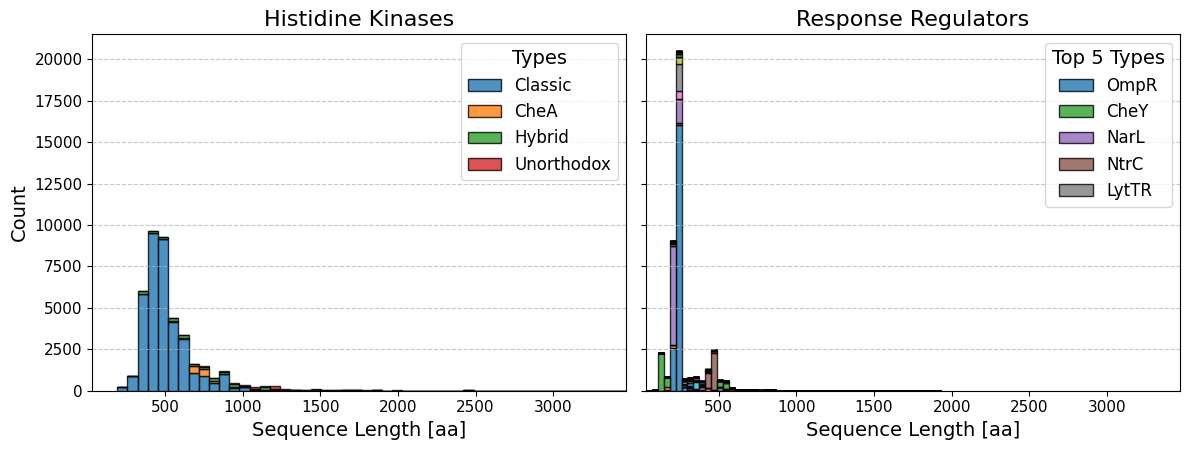

In [52]:
# Make stacked histograms by 'type' within each 'class'

bins = 50

# Prepare data for HK and RR, split by 'type'
hk_df = filtered_groups_df[filtered_groups_df['class'] == 'HK']
rr_df = filtered_groups_df[filtered_groups_df['class'] == 'RR']

# Find top 5 most abundant types in RR for legend
rr_type_counts = rr_df['type'].value_counts()
rr_top_types = rr_type_counts.head(5).index.tolist()

# Get all types for HK and RR
hk_types = hk_df['type'].unique()
rr_types = rr_df['type'].unique()

hk_type_lengths = [hk_df[hk_df['type'] == t]['aa_sequence'].apply(len) for t in hk_types]
rr_type_lengths = [rr_df[rr_df['type'] == t]['aa_sequence'].apply(len) for t in rr_types]

# Find global range for xlim
min_len = min([lengths.min() for lengths in hk_type_lengths if not lengths.empty] +
              [lengths.min() for lengths in rr_type_lengths if not lengths.empty])
max_len = max([lengths.max() for lengths in hk_type_lengths if not lengths.empty] +
              [lengths.max() for lengths in rr_type_lengths if not lengths.empty])

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# HK stacked histogram with all types, legend for all types
hk_patches = ax[0].hist(
    hk_type_lengths,
    bins=bins,
    stacked=True,
    label=hk_types,
    edgecolor='black',
    alpha=0.80,
    log=False  # <-- Use log scale on y-axis
)

ax[0].set_title('Histidine Kinases', fontsize=16)
ax[0].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_xlim(min_len, max_len)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].set_yscale('linear')  # Redundant with log=True, but for clarity
ax[0].tick_params(axis='both', which='both', labelsize=11)  # Set tick label size

# Show legend for all HK types
ax[0].legend(title='Types', fontsize=12, title_fontsize=14, loc='upper right')

# RR stacked histogram with all types, but custom legend for top 5
rr_patches = ax[1].hist(
    rr_type_lengths,
    bins=bins,
    stacked=True,
    label=rr_types,
    edgecolor='black',
    alpha=0.80,
    log=False  # <-- Use log scale on y-axis
)

ax[1].set_title('Response Regulators', fontsize=16)
ax[1].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[1].set_xlim(min_len, max_len)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].set_yscale('linear')  # Redundant with log=True, but for clarity
ax[1].tick_params(axis='both', which='both', labelsize=11)  # Set tick label size

# Set legend for 5 most abundant RR types
handles, labels = ax[1].get_legend_handles_labels()
rr_indices_top = [i for i, lab in enumerate(labels) if lab in rr_top_types]
top_handles = [handles[i] for i in rr_indices_top]
top_labels = [labels[i] for i in rr_indices_top]
ax[1].legend(top_handles, top_labels, title='Top 5 Types', fontsize=12, title_fontsize=14, loc='upper right')

# fig.suptitle('Distribution of Amino Acid Sequence Lengths by Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig("aa_lengths_by_class.svg", dpi=300)

plt.show()

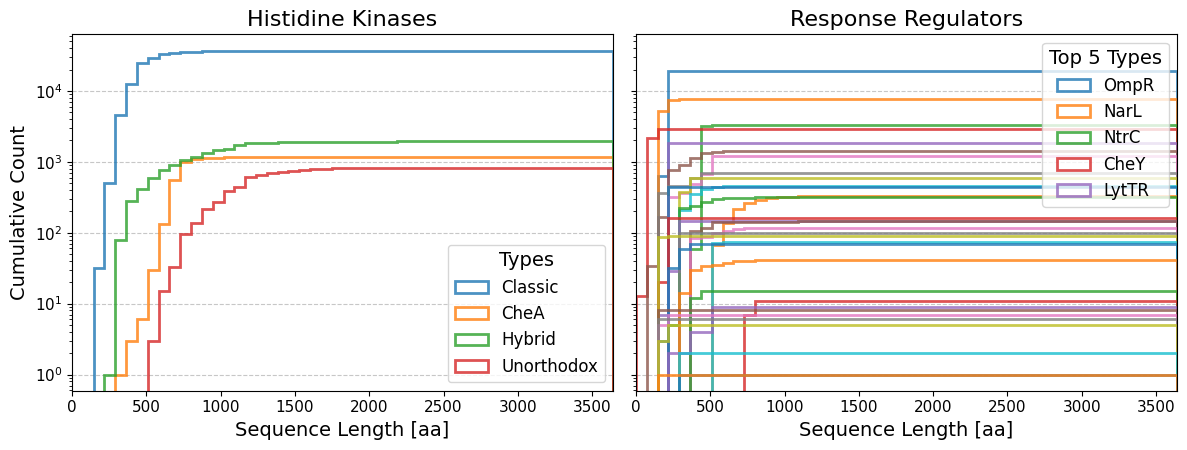

In [62]:
# Make histogram outlines by 'type' within each 'class'

bins = 50

# Prepare data for HK and RR, split by 'type'
hk_df = filtered_groups_df[filtered_groups_df['class'] == 'HK']
rr_df = filtered_groups_df[filtered_groups_df['class'] == 'RR']

# Find top 5 most abundant types in RR for legend
rr_type_counts = rr_df['type'].value_counts()
rr_top_types = rr_type_counts.head(5).index.tolist()

# Get all types for HK and RR
hk_types = hk_df['type'].unique()
rr_types = rr_df['type'].unique()

# Sort RR types by abundance (descending) so colors match abundance order
rr_types_sorted = rr_type_counts.index.tolist()  # Already sorted by count descending
rr_types = rr_types_sorted

hk_type_lengths = [hk_df[hk_df['type'] == t]['aa_sequence'].apply(len).values for t in hk_types]
rr_type_lengths = [rr_df[rr_df['type'] == t]['aa_sequence'].apply(len).values for t in rr_types]

# Find global range for xlim
min_len = min([lengths.min() for lengths in hk_type_lengths if len(lengths) > 0] +
              [lengths.min() for lengths in rr_type_lengths if len(lengths) > 0])
max_len = max([lengths.max() for lengths in hk_type_lengths if len(lengths) > 0] +
              [lengths.max() for lengths in rr_type_lengths if len(lengths) > 0])

# Create shared bins for consistent binning across all types
x_padding = (max_len - min_len) * 0.05
bin_edges = np.linspace(max(0, min_len - x_padding), max_len + x_padding, bins + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# HK cumulative histogram outlines with all types
for i, (type_name, lengths) in enumerate(zip(hk_types, hk_type_lengths)):
    if len(lengths) > 0:
        ax[0].hist(
            lengths,
            bins=bin_edges,
            histtype='step',
            label=type_name,
            alpha=0.80,
            linewidth=2,
            cumulative=True  # Make cumulative
        )

ax[0].set_title('Histidine Kinases', fontsize=16)
ax[0].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[0].set_ylabel('Cumulative Count', fontsize=14)
ax[0].set_xlim(max(0, min_len - x_padding), max_len + x_padding)
ax[0].set_yscale('log')  # Use log scale for counts
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].tick_params(axis='both', which='both', labelsize=11)

# Show legend for all HK types
ax[0].legend(title='Types', fontsize=12, title_fontsize=14, loc='lower right')

# RR cumulative histogram outlines with all types
for i, (type_name, lengths) in enumerate(zip(rr_types, rr_type_lengths)):
    if len(lengths) > 0:
        ax[1].hist(
            lengths,
            bins=bin_edges,
            histtype='step',
            label=type_name,
            alpha=0.80,
            linewidth=2,
            cumulative=True  # Make cumulative
        )

ax[1].set_title('Response Regulators', fontsize=16)
ax[1].set_xlabel('Sequence Length [aa]', fontsize=14)
ax[1].set_xlim(max(0, min_len - x_padding), max_len + x_padding)
ax[1].set_yscale('log')  # Use log scale for counts
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
ax[1].tick_params(axis='both', which='both', labelsize=11)

# Set legend for 5 most abundant RR types, ordered by abundance
handles, labels = ax[1].get_legend_handles_labels()
# Create a mapping from label to handle
label_to_handle = dict(zip(labels, handles))
# Get handles and labels in the order of rr_top_types (sorted by abundance)
top_handles = [label_to_handle[lab] for lab in rr_top_types if lab in label_to_handle]
top_labels = [lab for lab in rr_top_types if lab in label_to_handle]
ax[1].legend(top_handles, top_labels, title='Top 5 Types', fontsize=12, title_fontsize=14, loc='upper right')

# fig.suptitle('Distribution of Amino Acid Sequence Lengths by Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("aa_lengths_by_class.svg", dpi=300)

plt.show()

In [50]:
rr_df[rr_df['type'] == 'NtrC']['aa_sequence'].apply(len).mean()

np.float64(464.5571856287425)

## Organism / Operon Sizes

## Sequence Identity